# Clase 2: Regresión Lineal

## Introducción

Un modelo de regressión es un modelo que describe la relacion entre dos, o más, variables. Especificamente como una(s) de esta(s) variables, denominadas **variables independientes**, influyen en las variaciones de otra variable, denominada **variable dependiente**.

Supongamos queremos encontrar un modelo de regresion que nos permita estimar cual es el precio por metro cuadrado de una vivienda usando como variable observable la edad de la misma. Para poder construir este modelo necesitamos de un conjunto de datos historicos que relacionen el precio de la vivienda e indiquen su área. Para este ejemplo utilizaremos la base de datos 
*Residential Building Data Set*, la cual puede ser encontrada en el UCI repository en este [link](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set). Empecemos por cargar y observar los datos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Cargando el archivo de excel con los datos
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [ ]:
# Observando los datos
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


Text(0, 0.5, 'Price [dollars/$m^2$]')

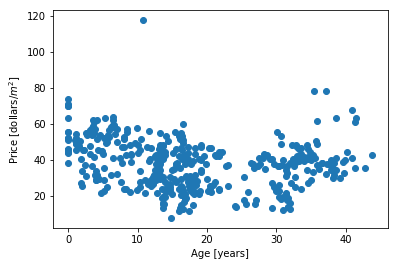

In [ ]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')

## Regresión Lineal Simple

vamos a suponer que el modelo que queremos encontrar es un modelo lineal de la forma $ h_\theta(x) = \theta_0+\theta_1x$. Donde $x$ representa la variable independiente, que en este caso sería la antiguedad de la vivienda, y $h_\theta(x)$ es el modelo (o hipotesis) que depende de los paramétros $\theta:\{\theta_0,\theta_1\}$. Este modelo se puede interpretar como una función que mapea los datos de entrada $x$ a valores en $y$. En este caso $y$ es la variable dependiente, y representa el precio por $\text{m}^2$ de la vivienda. El problema ahora radica en encontrar los valores  de los parámetros $\theta$ que de acuerdo a una metrica dada son capaces de realizar predicciones acertadas.

Antes de continuar definamos cierta nomenclatura para poder guiarnos a lo largo de la clase:

1. los escalares seran representados por medio de variables tal como $x$ y $y$
2. El número de observaciones que se tienen se denominara $m$
3. $(x^{(i)},y^{(i)})$ representa la $i$-ésima observación.

## Función de Costo

La idea general para solucionar el problema de regresión planteado en la sección anterior, es: encontrar los parámetros $\theta$ tal que $h_\theta(x)$ produce valores cercanos a $y$ para el conjunto de entrenamiento $(x,y)$.

**Pregunta:** Dado un valor de entrada $x$, ¿Cómo puedo medir que tan cercano de $y$ son los valores que obtengo con $h_\theta(x)$?

**Solución:** Existen muchas formas de medir esta distancia, se puede usar la distancia eculidea, u otro tipo de metrica que me permita medir distancias. Sin embargo, una de las más utilziadas es el *error cuadratico medio (Mean Least Squares)*.

### Error Cuadratico Medio

En nuestro problema de regresión el error cuadratio medio se define como:

$$e_{LS}(\theta)=\frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{(i)})-y^{(i)}]^2.$$

Una **función de costo** es una función que me indica cual es el costo en el cual incurre el modelo por seleccionar un conjunto de parametros $\theta$. La función de costo para nuestro problema de regression será el error cuadratico medio. Tradicionalmente la función de costo se expresa con la letra $J$. De esta forma el problema de regresión se enfoca en encontrar el conjunto de parametros $\theta$ que minimiza la función de costo, o en otras palabras se debe solucionar:

$$ \min_{\theta_0,\theta_1}J(\theta_0,\theta_1) $$

$$ \begin{equation}
   \begin{split}
      s.t.  & \quad & J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2,\\
            & \quad & h_\theta(x) = \theta_0+\theta_1x
   \end{split}
   \end{equation}$$

_Explicación de la intuición alrededor de la función de costo usando un solo parámetro en el modelo_ (Tablero virtual, ejemplo $y = x$)

### ¿Cómo luce la función de costo con múltiple variables?

En este caso nuestra función de costo es convexa, lo cual implica que podemos encontrar un mínimo global, la form de está función de costo es un paraboloide, como se muestra en la siguiente figura.

![title](img/Cost_Contour.png)

Ahora tratemos de ubicar cual es el valor de la funcion de costo para diferentes parámetros, así mismo como la salida del modelo.

![title](img/Cost_Contour_Test.png)

**Pregunta:** Suponga que para diferentes combinaciones de parámetros ${\theta_0, \theta_1}$ al ubicar el costo este se encuentran sobre el mismo contorno, ¿Qué podemos conlcuir?

**Solución:** Si esto sucede, esto significa que para todas estas combinaciones de parámetros el error de predicción del modelo es el mismo. Es decir, esas combinaciones de pará,metros producen el mismo costo.

## Aprendizaje de los Parámetros

En esta sección estudiaremos dos formas para poder _"aprender"_ cuales son los parámetros óptimos de nuestro modelo de regresión lineal. El pimer método es _algebraico_ y el segundo método es un algoritmo de busqueda utilizando técnicas de optimización.

### Soluciones de Forma Canonica

El probrema de rgresión lineal planteado en este ejercicio posee una solución canonica. Esto se debe a la forma de la superficie de error (Función de costo). Antes de continuar, par apoder entender la relación entre el problema y el Algebra lineal extendamos un poco la notación que hemos usado jhasta el momento:

1. Todos los vectores que trabajaremos son vectores columna y se representaran por letras minusculas en negrita.
2. El vector $\mathbf{x}=[x^{(1)},\ldots,x^{(m)}]$ es un vector que contiene todas las $m$ observaciones de la variable independiente. Este vector esta embebido en un espacio $m$-dimensional, es decir $\mathbf{x}\in\mathbb{R}^m$.
2. El vector $\mathbf{y}=[y^{(1)},\ldots,y^{(m)}]$ es un vector que contiene todas las observaciones de la variable dependiente, y $\mathbf{y}\in\mathbb{R}^m$.
3. El vector $\mathbf{1}_m$ es un vector columna con $m$ elementos, y todos sus elementos son unos, y $\mathbf{1}_m\in\mathbb{R}^m$
4. Las matrices se representan por medio de letras mayusculas en negrita.


Con la notación que hemos definido ahora podemos tratar de convertir todas nuestras ecuaciones en forma matricial.

**Pregunta:** Nuestro modelo esta definido por $h_\theta(x^{(i)}) = x^{(i)}*\theta_1+\theta_0$. este modelo produce por cada valor de $x$ un valor de salida. Utilizando vectores, es posible escribir esta ecuación de tal forma que se pueda encontrar la salida del modelo para varios valores $x$ en una sola operación. Plantee como quedaria este modelo utilizando producto de matrices y vectores.

**Solución:** El modelo en forma matricial queda expresado como $\mathbf{h_\theta}=[\mathbf{x}\:\mathbf{1}]\boldsymbol{\theta}$, donde $\boldsymbol{\theta}=[\theta_1 \quad \theta_0]$, $\theta\in\mathbb{R}^2$. Simplificando un poco más el modelo se puede definir $\mathbf{A} = [\mathbf{x} \: \mathbf{1}]$ como la matrix de regresores, las dimensiones de esta matrix son $m\times2$, es decir $\mathbf{A}\in\mathbb{R}^{m\times2}$. De esta forma el modelo se simplifica a $\mathbf{h_\theta}=\mathbf{A}\boldsymbol{\theta}$.

**Pregunta:** ¿Como se define la función de costo de forma matricial?

**Solución:** antes de definir la funcion de costo, definamos el error de estimación $\mathbf{e}=\mathbf{A}\boldsymbol{\theta}-\mathbf{y}$, donde $\mathbf{e}\in\mathbb{R}^m$. De esta forma la función de costo estaría dada por $J(\boldsymbol{\theta}) = \frac{1}{m}\mathbf{e}^\text{T}\mathbf{e}$, donde $\text{T}$ representa la transpuesta.

#### Entendiendo la función de costo

El objetivo de la función de costo del error cuadratico medio es minimizar la magnitud del error de aproximación. Ese error esta dado por las distancias calculadas entre la predicción del modelo y las observaciones. En la siguiente gráfica se presenta de forma más intuitiva este error.

![title](img/Error_Regresion.png)

Si consideramos que el error esta embebido en un espacio $m$-dimensional, entonces cada uno de los $m$ puntos de la función de error representa el valor que debe tomar en cada una de las coordenadas de ese espacio. Por lo tanto, si quiero calcular la magnitud del error, utilizo el producto punto, ya que $||\mathbf{e}||^2=\mathbf{e}^\text{T}\mathbf{e}$.

Por otro lado, si despejamos la variable independiente de la ecuación del error obtenemos la siguiente expresion $\mathbf{y} = \mathbf{A}\boldsymbol{\theta}+\mathbf{e}$. esta ecuación nos indica que el vector $\mathbf{y}$ se obtiene de la suma de dos vectores, uno que se encuentra embebido en el espacio de columnas de la matrix de regresores y que se calcula como $\mathbf{A}\boldsymbol{\theta}$, y otro que es el vector del error $\mathbf{e}$. Debido a que queremos minimizar el error tnemos que encontrar los parámetros $\theta$ que produzcan el error de menor magnitud posible. El vector del error de magnitud más pequeña que se puede encontrar y que conecte al vector $\mathbf{A}\boldsymbol{\theta}$ con el vector $\mathbf{y}$, es el vector que es perpendicular al espacio de columnas de $\mathbf{A}$. Es decir, al utilizar como función de costo el error cuadratico medio (la magnitud del vector de error) lo que estamos haciendo es encontrar la combinacion de parámetros $\mathbf{\theta}$ que producen la proyección ortogonal de $\mathbf{y}$ sobre el espacio de columnas de $\mathbf{A}$.

_Realizar la explicación de forma gráfica en el tablero virtual_

![title](img/Proyection.png)

#### Minimizando la función de costo

Ahora procedamos a minimizar la función de costo y encontrar la solución canonica a nuestro problema de regresión.

**Pregunta:** si mi función de costo esta dada por $J(\boldsymbol{\theta})=\frac{1}{m}\mathbf{e}^\text{T}\mathbf{e}$, con $\mathbf{e}=\mathbf{y}-\mathbf{A}\boldsymbol{\theta}$ ¿Cuál es el valor de $\theta$ que minimiza esa función de costo?

**Solución:** _(Realizar la derivación en el tablero digital)_ La solución debe dar $\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{-1}\mathbf{A}^\text{T}\mathbf{y}$. En la práctica, para evitar errores númericos, debido al mal acondicionamiento de matrices (cercanas a matrices singulares) se utiliza la pseudo-inversa, en lugar de la inversa. La pseudo inversa de l amatrix $\mathbf{A}$ se define como $\mathbf{A}^+$. De esa forma la solución esta dada por $\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{+}\mathbf{A}^\text{T}\mathbf{y}$.

#### Regresión en la práctica

Ahora vamos a aplicar está solución a nuestro ejemplo base.

In [ ]:
ones = np.ones((len(data),1))
x = data['X2 house age']
y = data['Y house price of unit area']
A = np.column_stack((x,ones))

theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(A),A)),np.transpose(A)),y)
print(theta)

[-0.25148842 42.43469705]


Graficando los resultados del modelo

In [ ]:
h = np.matmul(A,theta)

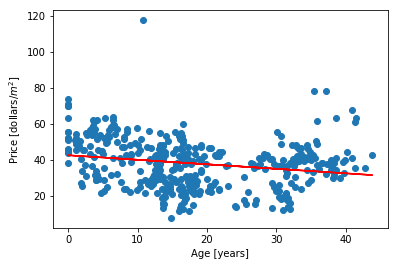

In [ ]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')
plt.plot(x,h,'r')

FUNCIONA!!!

**Pregunta:** ¿Qué problemas presenta la solución canonica?

**Solución:** Existen dos grandes restricciones:

1. La solución canonica requiere calcular la inversa de una matrix cuadrada de dimension $n\times n$, con $n$ el número de columnas de la matrix de regresores, lo cual es una operación del orden $\mathcal{O}(n^3)$. Por lo tanto, cuando se tienen muchos regresores, este problema tardaría mucho tiempo en resolverse y requeriria muchos recursos computacionales (memoria). Los sistemas de computo actuales pueden resolver inversas de matrices del orden $10.000 \times 10.000$ en un tiempo razonable. Sin emabgro si esto aumenta, el problema se vuelve cada vez más dificil de solucionar con los recursos computacionales actuales.

2. Esta solución canonica solamente funciona para encontrar el mínimo de la función de costo de error cuadratico medio y funciones afines. Pro lo cual sería interesante encontrar un método que permita encontrar lo spará,metros de una función de costo, independiente de la forma de esta función.

### Gradiente Descendiente

Debido a las limitaciones que puede tener la solución canonica del problema de regresión lineal, surge la necesidad de crear un algoritmo que se pueda utilizar independientemente si se tienen muchos regresores, o si la superficie de la función de costo no es convexa. El algoritmo mas sencillo y popular que hace esta tarea es gradiente descendiente.

La idea general de los algortimos de optimización es la siguiente:
1. Inicializar los parámetros $\{\theta_0,\theta_1\}$
2. Continuar cambiando los parametros para reducir la función de costo $J(\theta_0,\theta_1)$ hasta que converga a un valor mínimo (Se llegue a un valor mínimo o se estabilice la reducción en la función de costo).

**Nota:** Este procedimiento aplica también parafunciones de costo que dependan de muchas más variables.

![item](img/Grad_Desc.jpeg)

Es importante observar que dependiendo de la forma de la superficie de la función de costo, es posible que al inicializar el algoritmo para unos paramétros diferentes la unción converja a otro minimo local.

**Pregunta:** ¿En qué dirección debo desplazar los parámetros para lograr que la función de costo disminuya?, en otras palabras ¿Cómo pdebo cambiar lso parametros para que la función de costo disminuya?

**Solución:** 

Como se puede observar, la idea es actualizar los pesos en dirección contraria al gradiente de la función. Esto se expresa de la siguiente forma:

$$\theta_j := \theta_j-\alpha \frac{\partial}{\partial\theta_j}J(\boldsymbol{\theta}) $$

Donde $\boldsymbol{\theta} = [\theta_0 \: \theta_1]$, $\alpha$ se denomina la taza de aprendizaje (o la constante de aprendizaje) y siempre $\alpha>0$, y el simbolo $:=$ representa una asignación.


Es importante tener en cuenta que al realizar este procedimiento, las asignaciones se hagan todas de una sola vez, o que primero que calculen todos los valores de actualización y después se haga la asignación. Esto sucede porque la función de costo depende de todos los parametros, y si actualizamos uno de ellos y lo usamos para actualizar el siguiente, entonces nos estamos moviendo en la superficie de la función de costos y ya el valor del gradiente no es el mismo.

#### Intuición alrededor de Gradient Descent

Supongamos que se tiene una función de costo que depende de una sola variable $\theta_1$. Entonces la ecuación de actualización del parámetro esta dada por:

$$\theta_1 := \theta_1-\alpha\frac{d}{d\theta_1}J(\theta_1)$$

**Pregunta:** ¿Supongamos que nuestra funcion de costo es una parabola, ¿Explique como funciona gradient descent si al inicializar $\theta_1$ nos ubicamos a la izquierda o a la derecha del minimo.

**Solución:**

**Preguntas:** ¿Cúal es el efecto de la taza de aprendizaje en el algortimo?¿Qué sucede si es muy grande o si es muy pequeña?¿Cómo se define muy grande o muy pequeño?

**Solución:** 

**Pregunta:**  La siguiente figura muestra la evolución de l afunción de costo a medida que se actualizan los valores de los parámettros. Explique porque se le relaciona a cada curva la condición determinada de la taza de aprendizaje.

**Nota:** La absisa de la figura representa las epocas y no el parámetro que cambia, esta es una gráfica de Función de costo _vs_ epoca. Una epoca se refiere a una actalización completa de todos los paramétros del modelo.

![item](img/Cost_Ephocs.png)



**Solución:** 

**Pregunta** ¿ qué pasa si el parámetro se inicaliza en un mínimo de la función de costo?

**Solución:** 

#### Ecuaciones de Gradient Descent para Regresión Lineal

Para calcular las ecuaciones del gradiente descendiente debemos saber cual es el valor del gradiente de la función de costo. La función de costo esta definida por:

$$\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1) = \frac{\partial}{\partial\theta_j}\frac{1}{2m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2,$$

el número 2 que se inserta ayuda a simplificar una cosntante que aparece más adelante. Teniendo en cuenta que $h_\theta(x^{(i)}) = \theta_0+\theta_1x^{(i)}$, entonces las respectivas derivadas son:

$$ \begin{equation}
   \begin{split}
      \theta_0 &=& \theta_0-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]\\
      \theta_1 &=& \theta_1-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x^{(i)}
   \end{split}
   \end{equation}$$


De la actualización se puede observar lo siguiente:
1. La actualización para $\theta_0$ trata de hacer que el error tenga media cero, entonces corrige por el offset que ocasiona este parametro.
2. La actualización para $\theta_1$ trata de corregir la poendiente, de tal forma que el valor medio de corrección por la pendiente sea cero.

**Nota:** Estee algoritmo de gradiente descendiente se conoce como **_BATCH_** Gradiente Descent, esto significa que usa todo el conjunto de datos de entrenamiento para realizar la actualiación. algunos algoritmos usan solo un subconjunto de los datos de entrenamiento para su actualización, esos son versiones modificadas del gradient descent.

## Regresión Lineal Multivariable

En esta sección trataremos el caso cuando tenemos varios regresores (variables independientes). Para poder continuar adicionaremos algunas definiciones a la nomenclatura:

1. m es el número de observaciones (ejemplos de entrenamiento)
2. n es el número de caracterisicas (regresores)
3. $x_j^{(i)}$ es el valor de la caracteristica (regresor) $j$ en la $i$-ésima observación.
4. $\mathbf{x}^{(i)}$ es el vector de caracteristicas (regresores) de la $i-$ésima observación, y $\mathbf{x} \in \mathbb{R}^n$.
5. $\boldsymbol{\theta}$ es un vector columna con $n+1$, $\boldsymbol{\theta} \in \mathbb{R}^{n+1}$. (El $+1$ proviene del vector de unos que acompaña a $\theta_0$.

Ahora nuestro modelo contiene $n$ regresores y es de la forma:

$$h_\theta(x)= \theta_0+\theta_1x_1+\ldots+\theta_nx_n.$$

Lo cual se puede representar de forma vectorial como:

$$\mathbf{h_\theta(x)}= \mathbf{\theta}^{T}\mathbf{x}.$$

### Solución Canonica para Regresión Lineal multivariable

La solución para la regresión lineal múltivariable tiene la misma forma que la solución encontrada anteriormente. La única diferencia es que la matrix de regresores ahora esta formada por $\mathbf{A} = [\mathbf1_m \: \mathbf{X}]$, donde $\mathbf{X} = [\mathbf{x}^{(1)}\: \ldots\: \mathbf{x}^{(m)}]^\text{T}$.

De esta forma la solución sigue estando dada por:
$$\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{+}\mathbf{A}^\text{T}\mathbf{y}.$$

Con $\boldsymbol{\hat\theta} \in \mathbb{R}^{n+1}$.

**Pregunta:** ¿Qué sucede si hay multicolinearidad?
**Nota:** Multicolinearidad significa que dos o mas columnas de la matrix de regresores son linealmente dependientes.

**Solución:** 

### Gradiente Descendiente para Regresión Lineal multivariable

Siguiendo el mismo análisis anterior, las ecuaciones de actualización par alos parámetros utilizando gradiente descendiente son:

$$ \begin{equation}
   \begin{split}
      \theta_0 &=& \theta_0-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_0^{(i)}\\
      \theta_1 &=& \theta_1-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_1^{(i)}\\
      & & \vdots\\
      \theta_n &=& \theta_n-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_n^{(i)}\\
   \end{split}
   \end{equation}$$
   
Donde $x_0^{(i)}= 1$ para todo $i$.

## TAREA

**Punto 1.** Para la siguiente clase realicé una implementación en python del algoritmo de gradiente descencdiente. Esta implementación debe solucionar el problema de regresión que se trabajo en clase. Se debe tener en cuenta lo siguiente:

1. Debe realizar la implementación en un notebook de jupyter.
2. La implementación debe ser interactiva. Es decir yo deberia poder modificar la taza de aprendizaje por medio de un elemento de interacción, para esto estudie la libreria _ipywidgets_.
3. Se debe hacer una grafica de la función de costo a medida qu ese actualixan los parámetros, de tal forma qu ese pueda observar a medida qu elos parámetros cambia como cambia la función de costo.
4. Realicé la implementación para que funcione también para regresión múltiple.

**Punto 2.** Implemente la regresion lineal multivariable para encontrar un modelo para estimar el precio de una casa utilizando como regresores las variables $X_2, X_3,$ y $X_4$. ¿Cómo puede evaluar si el modelo multivariable tiene mejores resultados que el modelo univariable?

### Comparación entre gradiente descendiente y la solución canonica


|Gradiente Descendiente | Solución canonica |
| --- | --- |
| Debe definir $\alpha$ | No hay necesidad de $\alpha$|
| Necesita muchas iteraciones | Soluciona en una sola iteración|
| $\mathcal{O}(kn^2)$ | $\mathcal{O}(n^3)$|
| Trabaja bien para valores de $n$ grandes | Trabaja lentamente (o no se puede calcualar) para $n$ grande|

## Más allá de la Regresión Lineal

El modelo lineal que utilizamos en el caso de regresión lineal multivariable se peude extender para regresiones nolineales. El modelo esta expresado por:

$$h_\theta(x)= \theta_0+\theta_1x_1+\ldots+\theta_nx_n.$$

**Pregunta:** ¿Cómo se puede hacer esto?

**Solución:** 

**Pregunta:** ¿Qué significa que un modelo sea lineal?

**Solución:** 

**Ejercicio:** Muestre que la función $h_\theta(x)= \theta_0+\theta_1x_1+\theta_2x_1^2$ es lineal para los parámetros $\theta$ pero no para $x_1$.

## Regularización

Supongamos se tiene un conjunto de datos que siguen el modelo $h(x) = 2+x+2x^2$. Este e sun modelo de segundo orden, las observaciones (mediciones) que tomamos estan contaminados por una señal aleatoria, por lo cual estas mediciones no coinciden exactamente con el valor del modelo. Un ejemplo de como lucen estos datos se encuentra en el siguiente codigo.

In [ ]:
import random

# Creando un vector de numeros entre -1 y 1
x = np.linspace(-1,1,num=100)

# creando el vector de ruido
noise = []
# Set a length of the list to 10
for i in range(0, 100):
    # any random numbers from 0 to 1000
    noise.append(random.uniform(-0.5, 0.5))

# creando el vector de mediciones, segun el modelo especificado
y = 2+x+2*x**2+noise

Text(0, 0.5, 'y variable [a.u.]')

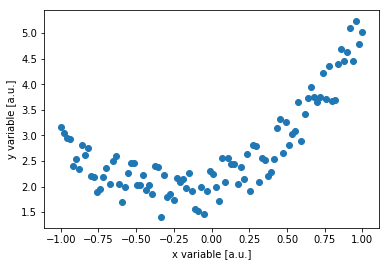

In [ ]:
#graficando los datos
plt.scatter(x,y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')

**Ejercicio:** Realice el ajuste a un modelo de orden 1.

In [ ]:
# Ajustando un polinomio de grado 1
ones = np.ones((len(x),1))
A = np.column_stack((x,ones))
theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(A),A)),np.transpose(A)),y)
print(theta)

[1.03373765 2.71017846]


**Pregunta:** ¿Qué tal se ajusta el modelo a los datos?

**Solución:** 

**Pregunta:** Realice un ajuste utilizando ahora un polinomio de segundo orden, ¿mejora?

**Solución:** 

Este ajuste es mucho mejor. Este es el ajuste adecuado.

**Pregunta:** Qué sucede si quiero hacer el ajuste usando un polinomio de orden 10, ¿Mejorarian los resultados?

**Solución** 

Calculemos el error para lso diferentes modelos

In [ ]:
e_1 = np.matmul(np.transpose((h_1-y)),(h_1-y))/len(x)
e_2 = np.matmul(np.transpose((h_2-y)),(h_2-y))/len(x)
e_10 = np.matmul(np.transpose((h_10-y)),(h_10-y))/len(x)
print("Error Cuadratico Medio del modelo lineal :",e_1)
print("Error Cuadratico Medio del modelo Cuadratico :",e_2)
print("Error Cuadratico Medio del modelo de orden 10 :",e_10)

Error Cuadratico Medio del modelo lineal : 0.07561253540770849
Error Cuadratico Medio del modelo Cuadratico : 0.07561253540770849
Error Cuadratico Medio del modelo de orden 10 : 0.07561253540770849


**Pregunta:** Tanto el modelo de orden 10 como el modelo del orden 2 producen el mismo error, ¿Qué modelo es mejor?

**Solución:** 

Para revisar overfittin extendamos la variación de los datos en $x$ de -2 a 2. Veamos que sucede con el modelo de orden 2 y con el modelo de orden 10.

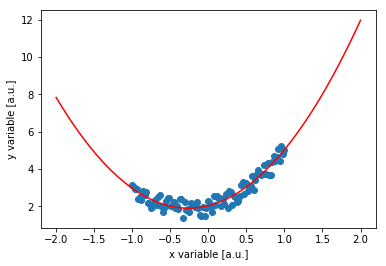

In [ ]:
x_test = np.linspace(-2,2,num=100)
A_test = np.column_stack((x_test**2,x_test,ones))
h_2_test = np.matmul(A_test,theta_2)

# Graficando las variables de interes
plt.scatter(x, y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')
plt.plot(x_test,h_2_test,'r')


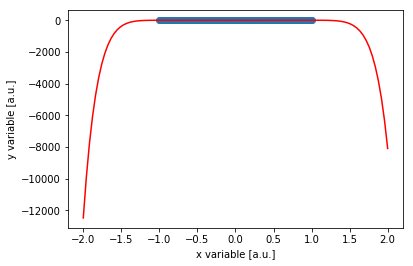

In [ ]:
x_test = np.linspace(-2,2,num=100)
A_10_test = np.column_stack((x_test**10, x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,x_test**4,x_test**3,x_test**2,x_test,ones))
h_10_test = np.matmul(A_10_test,theta_10)

# Graficando las variables de interes
plt.scatter(x, y)
plt.xlabel('x variable [a.u.]')
plt.ylabel('y variable [a.u.]')
plt.plot(x_test,h_10_test,'r')



**Pregunta:** ¿Qué modelo es mejor?

**Solución:** 

**Pregunta:** ¿Cómo puedo controlar el overfitting durante el entrenamiento?

**Solución:** 


### Planteamiento Matemático para la Regularización

Para poder obtener una solución con unos parámetros que tengan unaa magnitud adecuada (pequeña) se puede modificar la función de costo de la siguiente forma:

$$J(\theta) = \frac{1}{m}\left[\sum_{i=1}^{m}\left[\mathbf{h}_{\theta}(\mathbf{x})-\mathbf{y}\right]^2 + \gamma ||\boldsymbol\theta||^2\right].$$

**Note:** Esta funcion es similar a esta otra función de costo:

$$J(\theta) = \frac{1}{m}\left[\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2+\gamma\sum_{i = i}^n\theta_i^2\right].$$

Donde $\gamma$ es la constante de regularización. Al obligar que los pesos sean pequeños, esto ocasiona que:
1. El modelo se amás simple.
2. Que se reduzca la posibilidad de overfitting

**Nota:** Por convención no se penaliza $\theta_0$, pero en práctica no tiene mucho effecto.

**Pregunta:** ¿Qué hace $\lambda$? ¿Cómo escoger ese valor?

**Solución:** 

**Pregunta:** ¿Qué sucede si $\lambda$ es muy pequeño? ¿Qué sucedes si es muy grande?

**Solución:** 

**Pregunta:** si mi función de costo esta dada por $J(\boldsymbol{\theta})=\frac{1}{m}\left(||\mathbf{e}||_2^2+\gamma||\boldsymbol\theta||_2^2\right)$, con $\mathbf{e}=\mathbf{y}-\mathbf{A}\boldsymbol{\theta}$ ¿Cuál es el valor de $\theta$ que minimiza esa función de costo? aquñi se esta usando todos los parámetros.

**Solución:** 

**Pregunta:** ¿Qué se puede decir de esta nueva solución?

**Solución** 

## TAREA

**Punto 3.** Realice la derivación de las ecuaciones de actualización cuando se usa gradiente descendiente. Recuerde qu eno se actualizará $\theta_0$ usando la regularización, pero esta si aplicara para todos los demás parámetros. El resultado al que se debe llegar es:

$$ \begin{equation}
   \begin{split}
      \theta_0 &=& \theta_0-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_0^{(i)}\\
      \theta_1 &=& \theta_1-\alpha\left[\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_1^{(i)} + \frac{\lambda}{m}\theta_1\right]\\
      & & \vdots\\
      \theta_n &=& \theta_n-\alpha\left[\frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_n^{(i)} + \frac{\lambda}{m}\theta_n\right]\\
   \end{split}
   \end{equation}$$
   
Donde $x_0^{(i)}= 1$ para todo $i$. Agrupando los parámetros quedaria:

$$\theta_n =\theta_n\left(1-\alpha\frac{\lambda}{m}\right)-\alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_n^{(i)}$$

Basados en la ecuación anterior se puede observar que como $\alpha, \lambda$ y $m$ son positivos, entonces $\left(1-\alpha\frac{\lambda}{m}\right)<1$ entonces en cada paso que se realia el parametro $\theta_n$ es reducido. El segundo término es exactamente el mismo para el algoritmo de gradiente descendiente. Es por esta razón que al regularizar, se puede observar que en cada actualización los valores de los parámetros se disminuyen.

**Ejercicio:** Haz una regresión de Ridge utilizando los datos del ejemplo de la parabola. Usa diferentes valores de $\lambda$ empieza con $\lambda=1$. Justifica la selección final de $lambda=1$.

## Un poco mas sobre Tikhonov

La forma general de la regularización de Tikhonov es la siguiente:

$$\mathbf{J}(\mathbf{x}) = ||\mathbf{A}\mathbf{x}-\mathbf{b}||_\mathbf{P}^2+||\mathbf{x}-\bar{\mathbf{x}}||_\mathbf{Q}^2$$

Donde $P$ y $Q$ son matrices de peso, que determinan que tan relevante o no es una observación, o que definen otro dtipo de metrica, de forma general $||\mathbf{x}||_\mathbf{Q}^2 =\mathbf{x}^\text{T}\mathbf{Q}\mathbf{x}$, y $\bar{\mathbf{x}}$ es la media de $\mathbf{x}$. La solución a este problea esta dada por:

$$\hat{\mathbf{x}}=\left(\mathbf{A}^\text{T}\mathbf{P}\mathbf{A}+\mathbf{Q}\right)^{-1}\left(\mathbf{A}^\text{T}\mathbf{P}\mathbf{b}+\mathbf{Q}\bar{\mathbf{x}}\right),$$

o

$$\hat{\mathbf{x}}=\bar{\mathbf{x}}+\left(\mathbf{A}^\text{T}\mathbf{P}\mathbf{A}+\mathbf{Q}\right)^{-1}\left(\mathbf{A}^\text{T}\mathbf{P}\left(b-\mathbf{A}\bar{\mathbf{x}}\right)\right).$$

Es importante que en la práctica tengan en cuenta que muestras y que regresores son relevantes y cuales no lo son, esa información puede incluirse en las matrices $\mathbf{P}$ y $\mathbf{Q}$.

## Otras Formas de Regularización: LASSO (Least  Absolute Shrinkage and Selection Operator)

Otra forma de regularizar es penalizando no con la magnitud del vector de parámetros, pero con su valor absoluto. De esta forma la función de costo es:

$$J(\theta) = \frac{1}{m}\left[\sum_{i=1}^{m}\left[\mathbf{h}_{\theta}(\mathbf{x})-\mathbf{y}\right]^2 + \gamma ||\boldsymbol\theta||\right].$$

**Note:** Esta funcion es similar a esta otra función de costo:

$$J(\theta) = \frac{1}{m}\left[\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2+\gamma\sum_{i = i}^n|\theta_i|\right].$$


Este operador no tiene solución  canonica, su solución se puede buscar utilizando gradiente descendiente. Esta regularización se conoce como *basis pursuit* (*busqueda de bases*), porque como resultado trata de llevar a cero a algunos parametros, pro lo cual tambien se dice qu ees un regressor escaso, y puede servir para selección de que tipo de carcteristicas son utiles en el modelo.

Para poder entender porqué sucede esto, revisemos con las curvas de nivel esta función de costo:

![item](img/Regularizacion.png)

Aquí se puede ver que la función de costo de LASSO (a la izquierda) tiene una probabilidad más grande de encontrarse con las curvas de nivel del valor absoluto de los parametros en un eje, lo cual hace que la probabilidad de algunos parametros ser cero, aumenta. Para Ridge no sucede lo mismo.

Se puede también cambiar esa metrica y obtener otro tipo de factores de regularización, lo cual genera unas nuevas curvas de nivel para el costo de los parámetros. Tal como se muestra en la figura de abajo.

![item](img/Metricas.png)

**Nota:** Para terminar, cuando se usa como penalización la magnitud alcuadrado del vector de parámetros, esto se conoce como la **norma-**$\mathbf{\text{L}_2}$ , asi como se hace en la regresión de Ridge. LASSO por otro lado utiliza la **norma-**$\mathbf{\text{L}_1}$.